In [ ]:
import zipfile # Библиотека для работы с zip архивами

import os      # Библиотека для работы с фаловой системой 

import time    # Библиотека для работы со временем

from google.colab import drive # Модуль для работы с Google Disk

In [ ]:
# Подключаем гугл диск

drive.mount('/content/drive')

Mounted at /content/drive


# Извлекаем предобученную модель передачи стиля

In [ ]:
! tar -xvzf '/content/drive/MyDrive/arbitrary_style_transfer.tar.gz' 

arbitrary_style_transfer/
arbitrary_style_transfer/model.ckpt.index
arbitrary_style_transfer/model.ckpt.data-00000-of-00001
arbitrary_style_transfer/model.ckpt.meta


# Устанавливаем magenta 
# Стоит отметить, что поддержка magenta, по-видимому, прекратилась, поэтому установка этого окружения требует строкого определенных версий строго определенных библиотек

In [ ]:
# Install hmmlearn before downgrading Python
!pip install hmmlearn

# Downgrade Python
!apt-get update -y
!apt-get install python3.8
!update-alternatives --set python3 /usr/bin/python3.8
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python get-pip.py
import sys
# This path is Colab-runtime specific, check path in other systems.
_ = (sys.path.append("/usr/local/lib/python3.8/dist-packages"))


# Preinstall legacy packages
!pip install numba==0.48
!pip install numpy==1.23
!pip install packaging>=21.3
!pip install librosa==0.7.2

# Install Magenta
!pip install magenta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.1 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,009 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,669 kB]
Get:11 http://archive.ubuntu.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1

# Импортируем библиотеку magenta

In [ ]:
import magenta

# Производим обучение модели, как в инструкции
# Style dataset находится в хранилище по адресу в формате "tfrecord": gs://mobile-ml-wg/tfrecord/style_images/style_images.tfrecord
# Imagenet находится в хранилище по адресу: gs://mobile-ml-wg/tfrecord/imagenet2012/. Эти ссылки мы указываем при обучении модели, как в инструкции по ссылке https://github.com/magenta/magenta/tree/main/magenta/models/arbitrary_image_stylization#training-a-model

In [ ]:
logdir='/content/logdir'
! arbitrary_image_stylization_train \
      --batch_size=8 \
      --imagenet_data_dir='gs://mobile-ml-wg/tfrecord/imagenet2012/' \
      --vgg_checkpoint=/content/drive/MyDrive/vgg_16.ckpt \
      --inception_v3_checkpoint=/content/drive/MyDrive/inception_v3.ckpt \
      --style_dataset_file='gs://mobile-ml-wg/tfrecord/style_images/style_images.tfrecord' \
      --train_dir=/content/logdir/train_dir \
      --content_weights={\"vgg_16/conv3\":2.0} \
      --random_style_image_size=False \
      --augment_style_images=False \
      --center_crop=True \
      --logtostderr

Streaming output truncated to the last 5000 lines.
I0504 11:26:19.789387 139772056401664 saver.py:93] 0
INFO:tensorflow:/content/logdir/train_dir/model.ckpt-3.data-00000-of-00001
I0504 11:26:19.789473 139772056401664 saver.py:90] /content/logdir/train_dir/model.ckpt-3.data-00000-of-00001
INFO:tensorflow:685300
I0504 11:26:19.789553 139772056401664 saver.py:93] 685300
INFO:tensorflow:/content/logdir/train_dir/model.ckpt-3.meta
I0504 11:26:19.789622 139772056401664 saver.py:90] /content/logdir/train_dir/model.ckpt-3.meta
INFO:tensorflow:690000
I0504 11:26:19.789694 139772056401664 saver.py:93] 690000
INFO:tensorflow:Saving checkpoint to path /content/logdir/train_dir/model.ckpt
I0504 11:26:31.726899 139772056401664 supervisor.py:1113] Saving checkpoint to path /content/logdir/train_dir/model.ckpt
INFO:tensorflow:/content/logdir/train_dir/model.ckpt-3.index
I0504 11:26:36.133224 139772056401664 saver.py:90] /content/logdir/train_dir/model.ckpt-3.index
INFO:tensorflow:0
I0504 11:26:36.1335

# Производим инфиренс полученной модели, импортируя файл стиля () и файл контента (). Для этого создаем папку images, внутри которой находятся папки style_images и conctent_images. В папку style_images помещаем образец стиля, в папку content_images помещаем образец контента. 

In [ ]:
os.mkdir("images")

os.mkdir("images/style_images")

os.mkdir("images/content_images")

In [ ]:
! cd /content/arbitrary_style_transfer
! arbitrary_image_stylization_with_weights \
  --checkpoint=/content/arbitrary_style_transfer/model.ckpt \
  --output_dir=/content/output \
  --style_images_paths=images/style_images/cracked_0004.jpg \
  --content_images_paths=images/content_images/bridge-95.jpg \
  --image_size=256 \
  --content_square_crop=False \
  --style_image_size=256 \
  --style_square_crop=False \
  --logtostderr

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Instructions for updating:
non-resource variables are not supported in the long term
2023-05-07 13:33:27.690464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1';

# Выводим полученные изображения

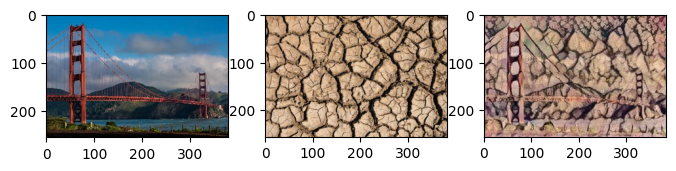

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
 
content = Image.open('/content/output/bridge-95.jpg')

style_pic =  Image.open('/content/output/cracked_0004.jpg')

result = Image.open('/content/output/bridge-95_stylized_cracked_0004_0.jpg')


fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (8,8))

#add data to plots
axs[0].imshow(content)

axs[1].imshow(style_pic)

axs[2].imshow(result)

In [ ]:
! tar -xvzf '/content/drive/MyDrive/mobilenet_v2_1.0_224.tgz' 

./
./mobilenet_v2_1.0_224_eval.pbtxt
./mobilenet_v2_1.0_224.ckpt.data-00000-of-00001
./mobilenet_v2_1.0_224_frozen.pb
./mobilenet_v2_1.0_224.tflite
./mobilenet_v2_1.0_224_info.txt
./mobilenet_v2_1.0_224.ckpt.meta
./mobilenet_v2_1.0_224.ckpt.index


# Производим преобразования полученной модели в формат TF Lite

In [ ]:
logdir='/content'
! arbitrary_image_stylization_convert_tflite \
      --checkpoint=/content/arbitrary_style_transfer \
      --imagenet_data_dir='gs://mobile-ml-wg/tfrecord/imagenet2012/' \
      --style_dataset_file='gs://mobile-ml-wg/tfrecord/style_images/style_images.tfrecord' \
      --output_dir=/content/tflight \
      --logtostderr

/bin/bash: arbitrary_image_stylization_convert_tflite: command not found


# Данная функция не работает (почему-то не поддерживается magenta), поэтому преобразование будем производить с помощью colab файла 
https://colab.research.google.com/drive/1fE2Ae3eyJnOMQGMR5imbZd-vV81q3ozR?usp=sharing, согласно описанию magenta


# Для различных степеней переноса протестируем модель для заданного стиля и контента

In [ ]:
! cd /content/arbitrary_style_transfer

! arbitrary_image_stylization_with_weights \
  --checkpoint=/content/arbitrary_style_transfer/model.ckpt \
  --output_dir=/content/output \
  --style_images_paths=/content/images/style_images/cracked_0004.jpg \
  --content_images_paths=/content/images/content_images/bridge-95.jpg \
  --image_size=256 \
  --content_square_crop=False \
  --style_image_size=256 \
  --style_square_crop=False \
  --interpolation_weights=$'[0.1,0.3,0.5,0.7,0.9]' \
  --logtostderr

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Instructions for updating:
non-resource variables are not supported in the long term
2023-05-07 14:40:37.666345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1';

# В итоге получили изображения с различными степенями переноса стиля

Text(0.5, 1.0, 'style_picture')

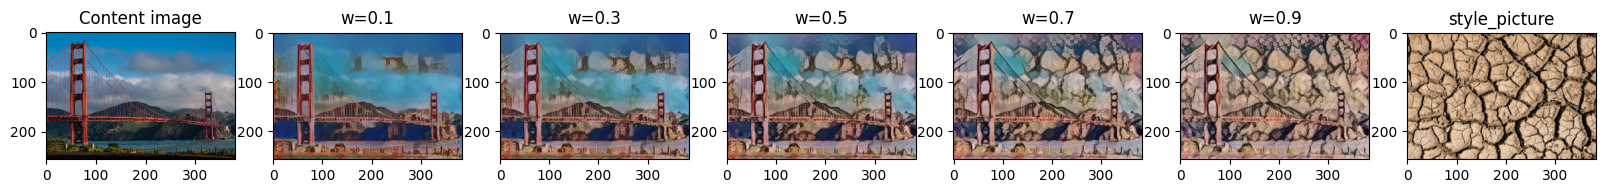

In [ ]:
content = Image.open('/content/output/bridge-95.jpg')

style_pic_0_1 =  Image.open('/content/output/bridge-95_stylized_cracked_0004_0.jpg')

style_pic_0_3 =  Image.open('/content/output/bridge-95_stylized_cracked_0004_1.jpg')

style_pic_0_5 =  Image.open('/content/output/bridge-95_stylized_cracked_0004_2.jpg')

style_pic_0_7 =  Image.open('/content/output/bridge-95_stylized_cracked_0004_3.jpg')

style_pic_0_9 =  Image.open('/content/output/bridge-95_stylized_cracked_0004_4.jpg')

style = Image.open('/content/output/cracked_0004.jpg')


fig, axs = plt.subplots(nrows= 1 , ncols= 7, figsize = (20,8))

#add data to plots
axs[0].imshow(content)

axs[0].set_title('Content image')

axs[1].imshow(style_pic_0_1)

axs[1].set_title('w=0.1')

axs[2].imshow(style_pic_0_3)

axs[2].set_title('w=0.3')

axs[3].imshow(style_pic_0_5)

axs[3].set_title('w=0.5')

axs[4].imshow(style_pic_0_7)

axs[4].set_title('w=0.7')

axs[5].imshow(style_pic_0_9)

axs[5].set_title('w=0.9')

axs[6].imshow(style)

axs[6].set_title('style_picture')

In [ ]:
! cd /content/arbitrary_style_transfer

! arbitrary_image_stylization_with_weights \
  --checkpoint=/content/arbitrary_style_transfer/model.ckpt \
  --output_dir=/content/output \
  --style_images_paths=/content/images/style_images/frilly_0007.jpg \
  --content_images_paths=/content/images/content_images/FordMustang.jpg \
  --image_size=256 \
  --content_square_crop=False \
  --style_image_size=256 \
  --style_square_crop=False \
  --interpolation_weights=$'[0.1,0.3,0.5,0.7,0.9]' \
  --logtostderr

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Instructions for updating:
non-resource variables are not supported in the long term
2023-05-07 15:01:07.782832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1';

# Протестируем на другой паре контента / стиля

Text(0.5, 1.0, 'style_picture')

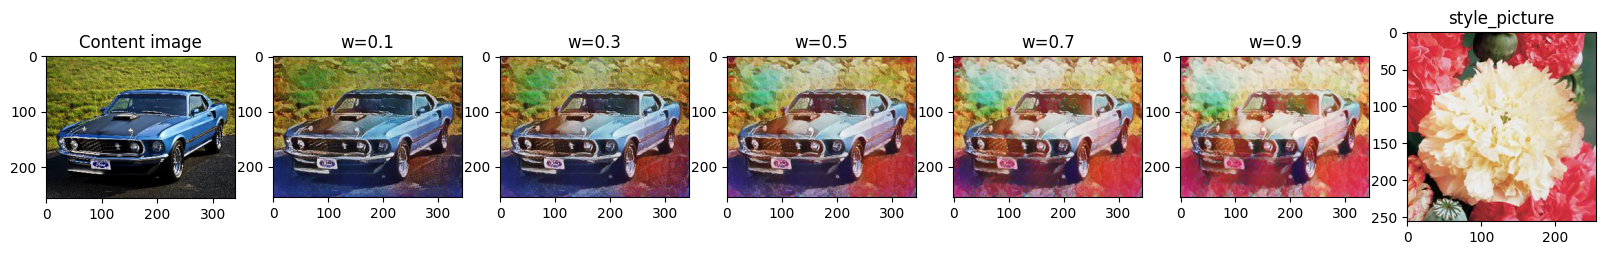

In [ ]:
content = Image.open('/content/output/FordMustang.jpg')

style_pic_0_1 =  Image.open('/content/output/FordMustang_stylized_frilly_0007_0.jpg')

style_pic_0_3 =  Image.open('/content/output/FordMustang_stylized_frilly_0007_1.jpg')

style_pic_0_5 =  Image.open('/content/output/FordMustang_stylized_frilly_0007_2.jpg')

style_pic_0_7 =  Image.open('/content/output/FordMustang_stylized_frilly_0007_3.jpg')

style_pic_0_9 =  Image.open('/content/output/FordMustang_stylized_frilly_0007_4.jpg')

style = Image.open('/content/output/frilly_0007.jpg')


fig, axs = plt.subplots(nrows= 1 , ncols= 7, figsize = (20,8))

#add data to plots
axs[0].imshow(content)

axs[0].set_title('Content image')

axs[1].imshow(style_pic_0_1)

axs[1].set_title('w=0.1')

axs[2].imshow(style_pic_0_3)

axs[2].set_title('w=0.3')

axs[3].imshow(style_pic_0_5)

axs[3].set_title('w=0.5')

axs[4].imshow(style_pic_0_7)

axs[4].set_title('w=0.7')

axs[5].imshow(style_pic_0_9)

axs[5].set_title('w=0.9')

axs[6].imshow(style)

axs[6].set_title('style_picture')